# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, joblib

# Step 2: Load Dataset

In [2]:
file_path = "global_startup_success_dataset.csv"  
df = pd.read_csv(file_path)

In [3]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (5000, 15)


In [4]:
df.head()

,Startup Name,Founded Year,Country,Industry,Funding Stage,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Acquired?,IPO?,Customer Base (Millions),Tech Stack,Social Media Followers
0,Startup_1,2009,Canada,Healthcare,Series A,269,3047,104,46.11,5,No,No,43,"Java, Spring",4158814
1,Startup_2,2004,UK,Healthcare,IPO,40,630,431,33.04,1,No,Yes,64,"Node.js, React",4063014
2,Startup_3,2018,USA,Healthcare,Seed,399,2475,375,15.79,8,No,No,74,"PHP, Laravel",3449855
3,Startup_4,2014,France,Tech,Seed,404,1011,907,17.12,7,Yes,Yes,26,"Python, AI",630421
4,Startup_5,2006,Japan,Energy,Series C,419,3917,280,4.39,6,Yes,Yes,30,"Node.js, React",365956


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup Name              5000 non-null   object 
 1   Founded Year              5000 non-null   int64  
 2   Country                   5000 non-null   object 
 3   Industry                  5000 non-null   object 
 4   Funding Stage             5000 non-null   object 
 5   Total Funding ($M)        5000 non-null   int64  
 6   Number of Employees       5000 non-null   int64  
 7   Annual Revenue ($M)       5000 non-null   int64  
 8   Valuation ($B)            5000 non-null   float64
 9   Success Score             5000 non-null   int64  
 10  Acquired?                 5000 non-null   object 
 11  IPO?                      5000 non-null   object 
 12  Customer Base (Millions)  5000 non-null   int64  
 13  Tech Stack                5000 non-null   object 
 14  Social M

# Step 3: Data Cleaning & Preprocessing

In [6]:
# Drop irrelevant columns
df.drop(columns=['Startup Name'], inplace=True,errors='ignore')

In [7]:
# Encode 'Yes'/'No' to 1/0 in binary categorical columns
df["Acquired?"] = df["Acquired?"].map({"Yes": 1, "No": 0})
df["IPO?"] = df["IPO?"].map({"Yes": 1, "No": 0})

In [8]:
# Process Tech Stack - count of technologies used
df['Tech Stack Count'] = df['Tech Stack'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df.drop(columns=['Tech Stack'], inplace=True)

In [9]:
# Confirm no missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Founded Year                0
Country                     0
Industry                    0
Funding Stage               0
Total Funding ($M)          0
Number of Employees         0
Annual Revenue ($M)         0
Valuation ($B)              0
Success Score               0
Acquired?                   0
IPO?                        0
Customer Base (Millions)    0
Social Media Followers      0
Tech Stack Count            0
dtype: int64


In [10]:
# Categorize 'Success Score' into 3 levels: Low, Medium, High
def categorize_success(score):
    if score <= 3:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

df["Success Category"] = df["Success Score"].apply(categorize_success)
print("\nUpdated Data Shape:", df.shape)
df.head()


Updated Data Shape: (5000, 15)


,Founded Year,Country,Industry,Funding Stage,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Acquired?,IPO?,Customer Base (Millions),Social Media Followers,Tech Stack Count,Success Category
0,2009,Canada,Healthcare,Series A,269,3047,104,46.11,5,0,0,43,4158814,2,Medium
1,2004,UK,Healthcare,IPO,40,630,431,33.04,1,0,1,64,4063014,2,Low
2,2018,USA,Healthcare,Seed,399,2475,375,15.79,8,0,0,74,3449855,2,High
3,2014,France,Tech,Seed,404,1011,907,17.12,7,1,1,26,630421,2,Medium
4,2006,Japan,Energy,Series C,419,3917,280,4.39,6,1,1,30,365956,2,Medium


# Step 4. Exploratory Data Analysis (EDA)

# • Frequency of Categorical Features

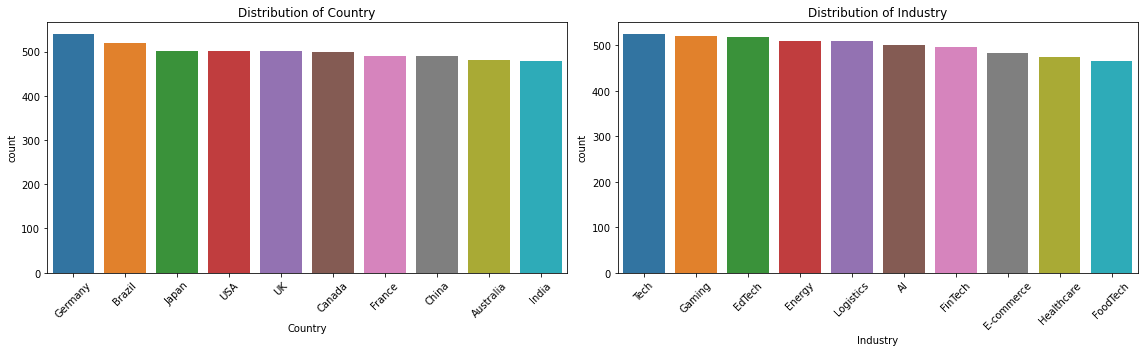

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Country", "Industry"]  # ✅ Fixed typo: "iNDUSTRY]"

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # Adjust width if needed

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

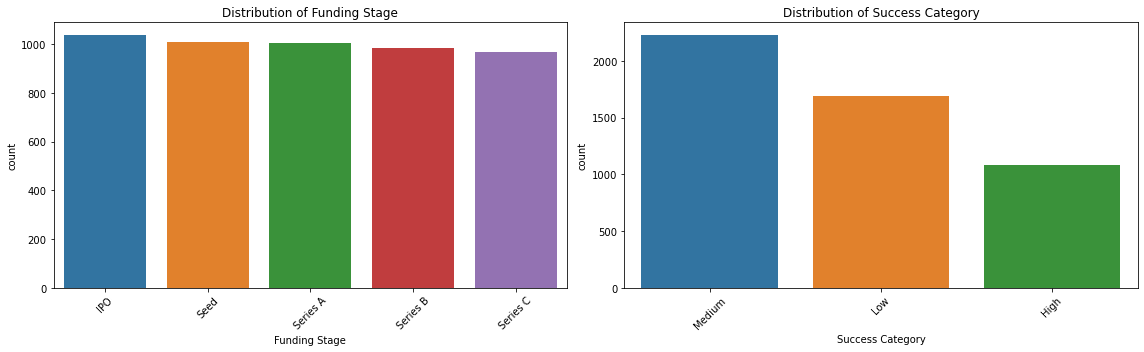

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Funding Stage", "Success Category"]  # ✅ Fixed typo: "sUCCESS CATEGORY"

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # Wider figure to fit both plots

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# • Distribution and Outliers in Numerical Features

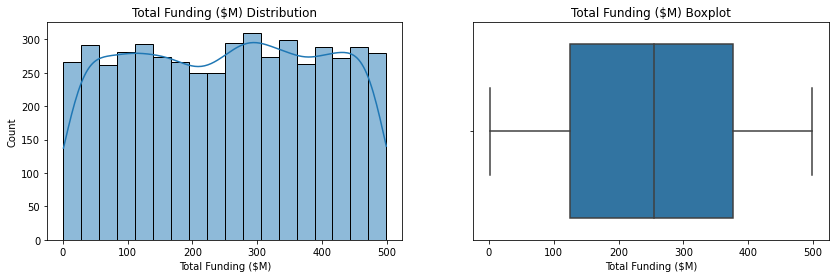

In [13]:
numerical_cols = [ "Total Funding ($M)" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Total Funding ($M) Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Total Funding ($M) Boxplot")
    plt.show()

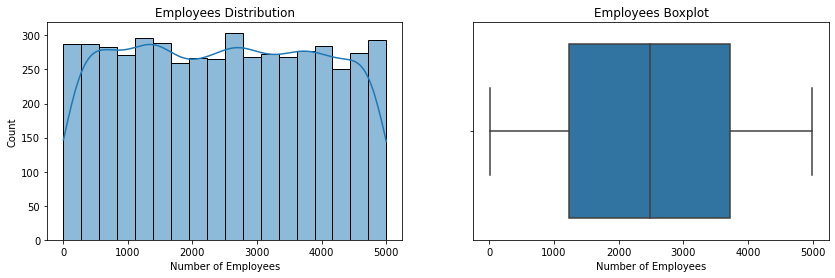

In [14]:
numerical_cols = [ "Number of Employees" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Employees Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Employees Boxplot")
    plt.show()

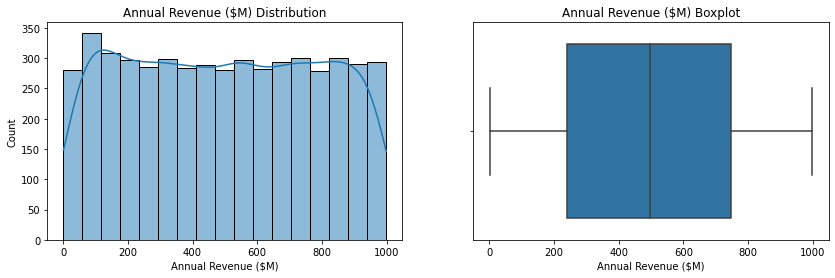

In [15]:
numerical_cols = [ "Annual Revenue ($M)" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Annual Revenue ($M) Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Annual Revenue ($M) Boxplot")
    plt.show()

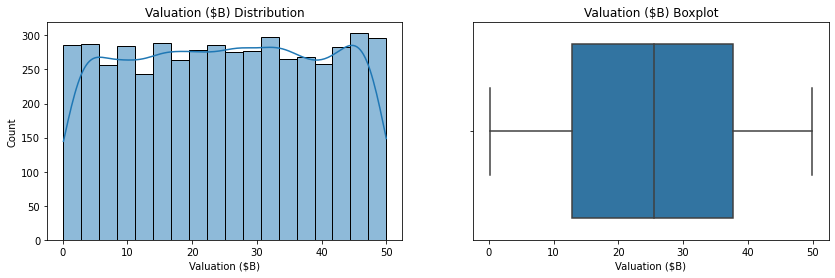

In [16]:
numerical_cols = [ "Valuation ($B)" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Valuation ($B) Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Valuation ($B) Boxplot")
    plt.show()

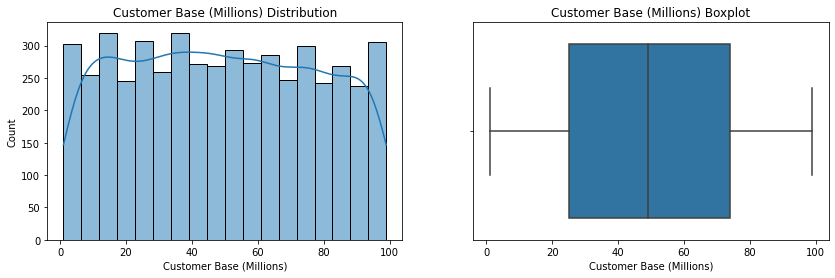

In [17]:
numerical_cols = [ "Customer Base (Millions)" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Customer Base (Millions) Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Customer Base (Millions) Boxplot")
    plt.show()

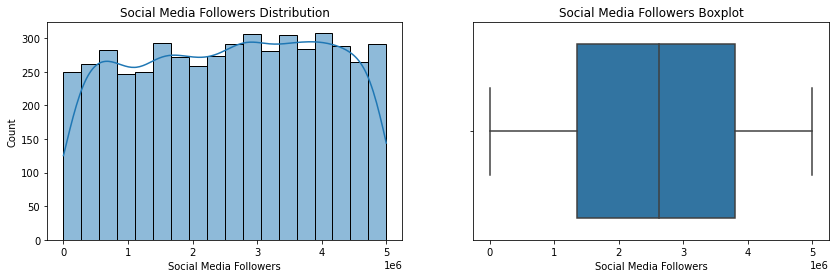

In [18]:
numerical_cols = [ "Social Media Followers" ]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Social Media Followers Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Social Media Followers Boxplot")
    plt.show()

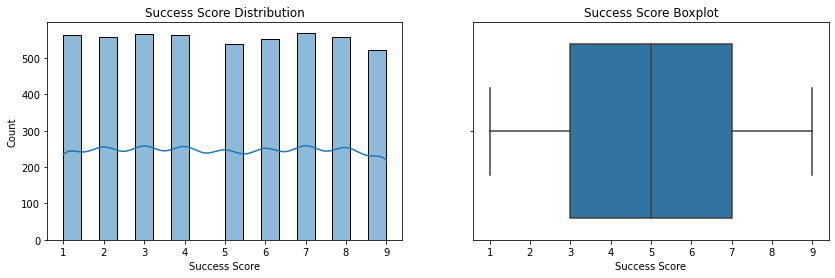

In [19]:
numerical_cols = [ "Success Score"]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Success Score Distribution")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Success Score Boxplot")
    plt.show()

# • Impact of Categories on Startup Success

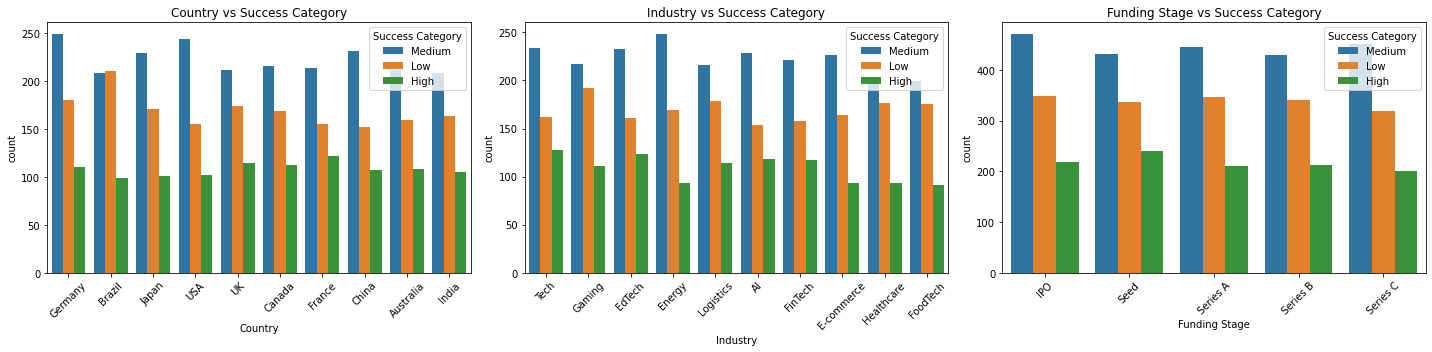

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Country", "Industry", "Funding Stage"]

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Success Category", order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} vs Success Category")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# • Numerical Features Across Success Levels

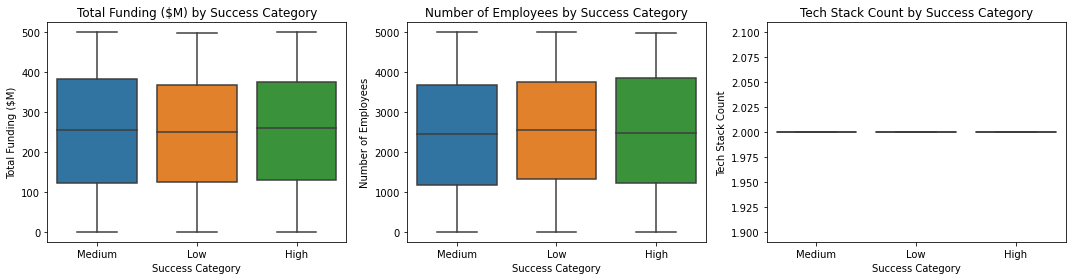

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Customize this list with your actual numerical columns
numerical_cols = ['Total Funding ($M)', 'Number of Employees', 'Tech Stack Count']  # <-- change as needed

# Step 2: Create subplots
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5 * len(numerical_cols), 4))

# Step 3: Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x="Success Category", y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Success Category")

plt.tight_layout()
plt.show()

# • Correlation Among Numerical Features

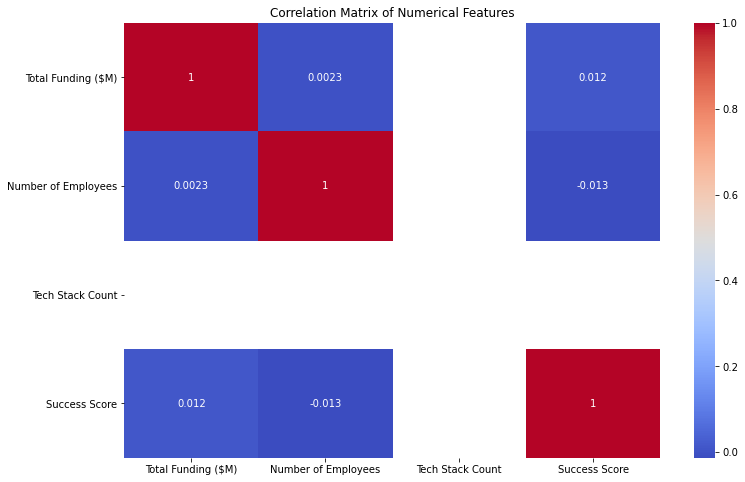

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols + ['Success Score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# • Log-Transformed Revenue Distribution

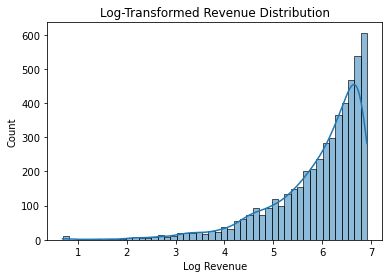

In [23]:
df["Log Revenue"] = np.log1p(df["Annual Revenue ($M)"])
sns.histplot(df["Log Revenue"], kde=True)
plt.title("Log-Transformed Revenue Distribution")
plt.show()

# • Correlation Heatmap of Startup Dataset 

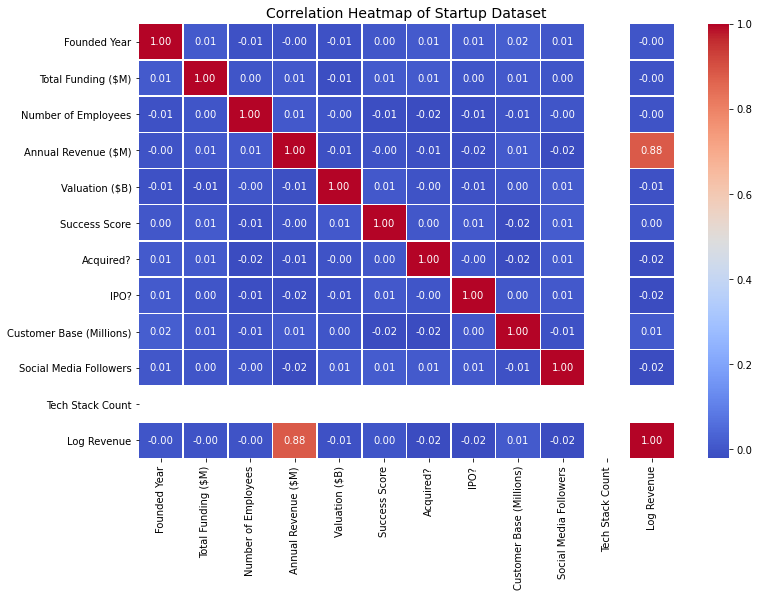

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Startup Dataset", fontsize=14)
plt.show()

# Step 5: Feature Engineering

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# Encode Success Category (Target)
le = LabelEncoder()
df["Success_Category_Encoded"] = le.fit_transform(df["Success Category"])

In [27]:
# Create new feature: Startup Age
df["Startup Age"] = 2025 - df["Founded Year"]

In [28]:
# Drop original non-useful columns (adjust as needed)
drop_cols = ["Success Score", "Founded Year"]
df = df.drop(columns=drop_cols)

In [29]:
# One-hot encode categorical variables
categorical_to_encode = ["Country", "Industry", "Funding Stage"]
df = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

# Step 6: Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [31]:
# Features and Target
X = df.drop(columns=["Success Category", "Success_Category_Encoded"])
y = df["Success_Category_Encoded"]

In [32]:
# One-hot encode if not already done
X = pd.get_dummies(X, drop_first=True)

In [33]:
print("Training features:", X.columns.tolist())

Training features: ['Total Funding ($M)', 'Number of Employees', 'Annual Revenue ($M)', 'Valuation ($B)', 'Acquired?', 'IPO?', 'Customer Base (Millions)', 'Social Media Followers', 'Tech Stack Count', 'Log Revenue', 'Startup Age', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Japan', 'Country_UK', 'Country_USA', 'Industry_E-commerce', 'Industry_EdTech', 'Industry_Energy', 'Industry_FinTech', 'Industry_FoodTech', 'Industry_Gaming', 'Industry_Healthcare', 'Industry_Logistics', 'Industry_Tech', 'Funding Stage_Seed', 'Funding Stage_Series A', 'Funding Stage_Series B', 'Funding Stage_Series C']


In [34]:
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))

Cross-validated accuracy: 0.41439999999999994


In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (4000, 33)
Test set shape: (1000, 33)


In [38]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# ✅ Models to compare
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Step 7: Model Training & Evaluation

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Initialize and train model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.418


In [44]:
print(set(y_pred))

{0, 1, 2}


In [45]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

        High       0.13      0.01      0.03       216
         Low       0.33      0.23      0.27       338
      Medium       0.45      0.76      0.57       446

    accuracy                           0.42      1000
   macro avg       0.31      0.33      0.29      1000
weighted avg       0.34      0.42      0.35      1000



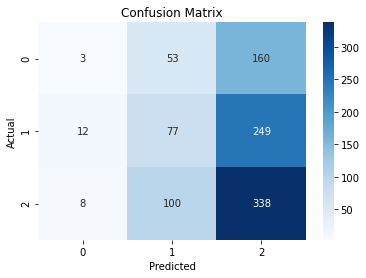

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
inv_label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
y_test_labels = y_test.map(inv_label_map)
y_pred_labels = pd.Series(y_pred).map(inv_label_map)

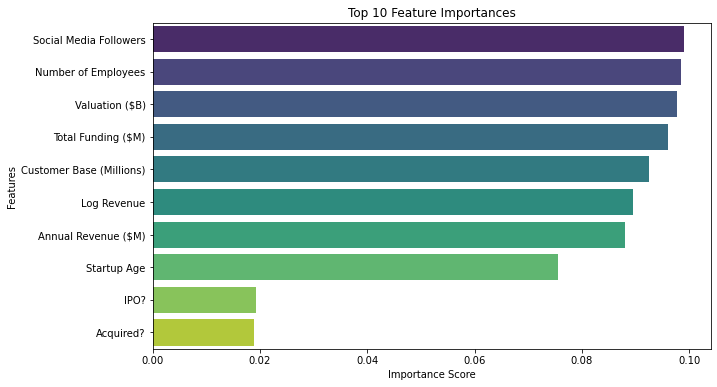

In [48]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [49]:
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

Random Forest Accuracy: 0.418
Logistic Regression Accuracy: 0.446
Decision Tree Accuracy: 0.373
SVM Accuracy: 0.446
Naive Bayes Accuracy: 0.446


In [50]:
# ✅ Save best model
model_filename = "best_startup_model.pkl"
scaler_filename = "scaler.pkl"

# Save the model
with open(model_filename, "wb") as f:
    pickle.dump(best_model, f)

# Save the scaler
with open(scaler_filename, "wb") as f:
    pickle.dump(scaler, f)

# Print confirmation
print(f"\n✅ Best Model '{best_model_name}' saved as '{model_filename}'")
print(f"✅ Scaler saved as '{scaler_filename}'")


✅ Best Model 'Logistic Regression' saved as 'best_startup_model.pkl'
✅ Scaler saved as 'scaler.pkl'


In [51]:
# To Load and Use Later:

# ✅ Load model
with open("best_startup_model.pkl", "rb") as f:
    model = pickle.load(f)

# ✅ Load scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Step 8: Store Model Output

In [52]:
# Save predictions alongside input features
result_df = X_test.copy()
result_df["Actual Category"] = y_test_labels.values
result_df["Predicted Category"] = y_pred_labels.values

In [53]:
df.columns.tolist()

['Total Funding ($M)',
 'Number of Employees',
 'Annual Revenue ($M)',
 'Valuation ($B)',
 'Acquired?',
 'IPO?',
 'Customer Base (Millions)',
 'Social Media Followers',
 'Tech Stack Count',
 'Success Category',
 'Log Revenue',
 'Success_Category_Encoded',
 'Startup Age',
 'Country_Brazil',
 'Country_Canada',
 'Country_China',
 'Country_France',
 'Country_Germany',
 'Country_India',
 'Country_Japan',
 'Country_UK',
 'Country_USA',
 'Industry_E-commerce',
 'Industry_EdTech',
 'Industry_Energy',
 'Industry_FinTech',
 'Industry_FoodTech',
 'Industry_Gaming',
 'Industry_Healthcare',
 'Industry_Logistics',
 'Industry_Tech',
 'Funding Stage_Seed',
 'Funding Stage_Series A',
 'Funding Stage_Series B',
 'Funding Stage_Series C']

In [54]:
# Save to CSV for dashboard/Power BI/Excel
result_df.to_csv("Final-startup_success_predictions.csv", index=False)
print("\nPredictions saved to 'Final-startup_success_predictions.csv'")


Predictions saved to 'Final-startup_success_predictions.csv'
